<a href="https://colab.research.google.com/github/shivangi2810/Image-Classification-using-Deep-learning/blob/main/Chest_X_ray_CNN_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pneumonia is an inflammatory lung condition affecting primarily the small air sacs known as alveoli. The symptoms include dry cough, chest pain, fever and difficulty breathing.
In this assignment we are going to train our model using a number of X ray images of normal lungs and infected lungs with the help of Convolutional Neural Network. Then we will try to predict and classify any X ray image of lungs under the categories:                      "Normal" or "Pneumonia"**

**Here we have a Balanced data that means we have 300 images in normal class and 300 images in pneumonia class.**

In [ ]:
# importing libraries 
# ImageDataGenerator is going to help us with implementing the image augmentation technique during the training process.
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # for fancy visualization of data loading (tqdm derives from the Arabic word 'taqaddum' which can mean “progress”)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [ ]:
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, (200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files]) # img name is like this :- "person1946_bacteria_4874", so split by '_' and take 1st position(bacteria)
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, (200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels


In [ ]:
norm_images, norm_labels = load_normal('/content/drive/MyDrive/Chest X ray 1/train/normal/')
pneu_images, pneu_labels = load_pneumonia('/content/drive/MyDrive/Chest X ray 1/train/pneumonia/')

100%|██████████| 300/300 [03:22<00:00,  1.48it/s]


Both norm_images and pneu_images are going to be our X data while the rest is going to be y data. 

In [ ]:
X_train = np.append(norm_images, pneu_images, axis=0)
y_train = np.append(norm_labels, pneu_labels)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(600, 200, 200)
(600,)


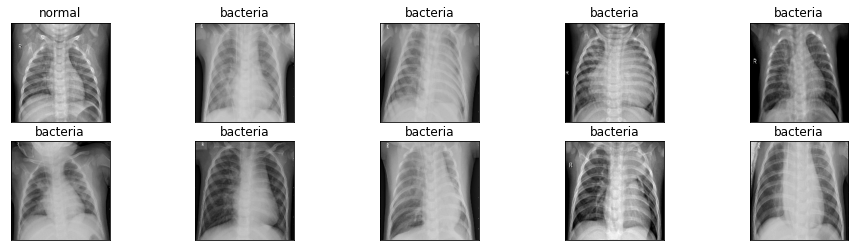

In [ ]:
# displaying some of the images

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))

indices = np.random.choice(len(X_train), 10)
counter = 0

for i in range(2):
    for j in range(5):
        axes[i,j].set_title(y_train[indices[counter]])
        axes[i,j].imshow(X_train[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()


All images are now having the exact same size now




In [ ]:
norm_images_test, norm_labels_test = load_normal('/content/drive/MyDrive/Chest X ray 1/test/normal/')
pneu_images_test, pneu_labels_test = load_pneumonia('/content/drive/MyDrive/Chest X ray 1/test/pneumonia/')

X_test = np.append(norm_images_test, pneu_images_test, axis=0)
y_test = np.append(norm_labels_test, pneu_labels_test)

100%|██████████| 242/242 [02:39<00:00,  1.52it/s]


In [ ]:
print(X_test.shape)
print(y_test.shape)

(476, 200, 200)
(476,)


In [ ]:
# Saving the loaded images to pickle file for future use

# with open('pneumonia_data.pickle', 'wb') as f:
#     pickle.dump((X_train, X_test, y_train, y_test), f)# Use this to load variables
# with open('pneumonia_data.pickle', 'rb') as f:
#     (X_train, X_test, y_train, y_test) = pickle.load(f)

In [ ]:
y_train = y_train[:, np.newaxis] #  [:,np.newaxis] is used when you want to explicitly convert a 1D array to a column vector, [np.newaxis,:] is used when you want to explicitly convert a 1D array to a row vector
y_test = y_test[:, np.newaxis]

In [ ]:
print(y_train.shape)
print(y_test.shape)

(600, 1)
(476, 1)


In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
y_train_one_hot = one_hot_encoder.fit_transform(y_train)
y_test_one_hot = one_hot_encoder.transform(y_test)

In [ ]:
y_train[:5],y_train_one_hot[:5]

(array([['normal'],
        ['normal'],
        ['normal'],
        ['normal'],
        ['normal']], dtype='<U8'), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [ ]:
# height, width, channels, batch size
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(600, 200, 200, 1)
(600, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(476, 200, 200, 1)
(476, 1)


In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train_one_hot, batch_size = 32)

In [ ]:
input1 = Input(shape=(X_train.shape[1], X_train.shape[2], 1))

cnn = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Conv2D(16, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = Conv2D(32, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Flatten()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(2, activation='softmax')(cnn)

model = Model(inputs=input1, outputs=output1)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      2064      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0     

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [ ]:
model.fit_generator(train_gen, epochs=30
          ,validation_data=(X_test,y_test_one_hot))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
19/19 [==============================] - 9s 122ms/step - loss: 98.9107 - acc: 0.5051 - val_loss: 2.7572 - val_acc: 0.7143
Epoch 2/30
19/19 [==============================] - 2s 97ms/step - loss: 1.6713 - acc: 0.7387 - val_loss: 1.2890 - val_acc: 0.7038
Epoch 3/30
19/19 [==============================] - 2s 98ms/step - loss: 0.4887 - acc: 0.8334 - val_loss: 1.3819 - val_acc: 0.6576
Epoch 4/30
19/19 [==============================] - 2s 98ms/step - loss: 0.3310 - acc: 0.8581 - val_loss: 0.7394 - val_acc: 0.7836
Epoch 5/30
19/19 [==============================] - 2s 95ms/step - loss: 0.2910 - acc: 0.8648 - val_loss: 0.6399 - val_acc: 0.7857
Epoch 6/30
19/19 [==============================] - 2s 96ms/step - loss: 0.3272 - acc: 0.8717 - val_loss: 0.5903 - val_acc: 0.8172
Epoch 7/30
19/19 [==============================] - 2s 95ms/step - loss: 0.2895 - acc: 0.9027 - val_loss: 0.5901 - val_acc: 0.7983
Epoch 8/30
19/19 [==============================] - 2s 97ms/step - loss: 0.2316 -

**So the accuracy comes nearly about 95% for training data and roughly 79% for testing data**

In [ ]:
model.save('/content/drive/MyDrive/chest_model1.h5')

In [ ]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions) # to get back to the name of classes from one hot encoding

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
cm

array([[211,  31],
       [ 36, 198]])

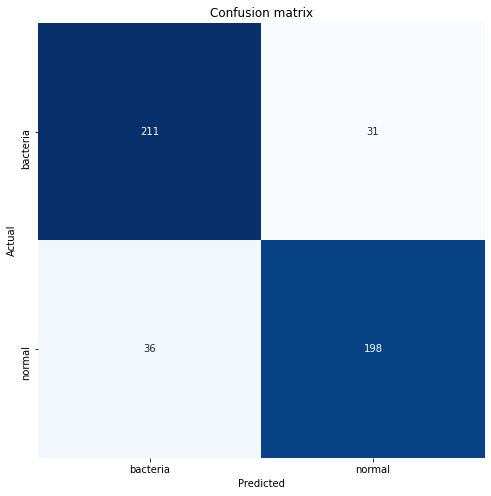

In [ ]:
classnames = ['bacteria', 'normal']

# Display confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**So we see that the Type 1 error that shows the number of normal predicted images which were actually infected by bacterial pneumonia are less(9).**

**Also we see that the Type 2 error that shows the number of infected predicted images which were actually normal are higher(89).**

**The true positive rate for the “pneumonia” class is- 233**

**The false positive rate for the “normal” class is- 9**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    bacteria       0.85      0.87      0.86       242
      normal       0.86      0.85      0.86       234

    accuracy                           0.86       476
   macro avg       0.86      0.86      0.86       476
weighted avg       0.86      0.86      0.86       476



In [ ]:
accuracy_score(y_test,predictions)*100

85.92436974789915

**We have achieved a Precision of 0.72
and the Recall value is 0.96 for bacteria**

**We have achieved a Precision of 0.94
and the Recall value is 0.62 for normal**

**Evaluating for some random validation images:-**

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/Chest X ray 1/val/normal/NORMAL2-IM-1437-0001.jpeg")

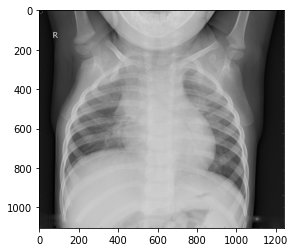

In [ ]:
plt.imshow(img1)
plt.show()

In [ ]:
gray_img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

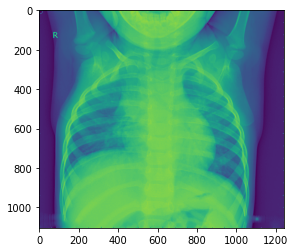

In [ ]:
plt.imshow(gray_img1)
plt.show()

In [ ]:
gray_img1 = cv2.resize(gray_img1, dsize=(200,200))
gray_img1 = gray_img1.reshape(1,200, 200, 1)
gray_img1.shape

(1, 200, 200, 1)

In [ ]:
predictions = model.predict(gray_img1)
predictions = one_hot_encoder.inverse_transform(predictions)

In [ ]:
print("Predicted value: ",predictions[0][0])

Predicted value:  bacteria


In [ ]:
img2=cv2.imread("/content/drive/MyDrive/Chest X ray 1/val/pneumonia/person1952_bacteria_4883.jpeg")

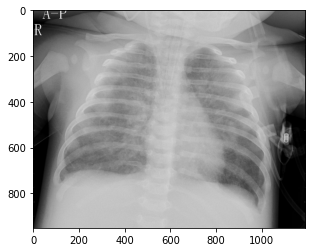

In [ ]:
plt.imshow(img2)
plt.show()

In [ ]:
gray_img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

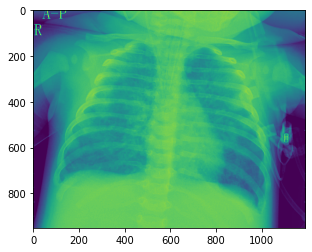

In [ ]:
plt.imshow(gray_img2)
plt.show()

In [ ]:
gray_img2 = cv2.resize(gray_img2, dsize=(200,200))
gray_img2 = gray_img2.reshape(1,200, 200, 1)
gray_img2.shape

(1, 200, 200, 1)

In [ ]:
predictions = model.predict(gray_img2)
predictions = one_hot_encoder.inverse_transform(predictions)

In [ ]:
print("Predicted value: ",predictions)

Predicted value:  [['bacteria']]


**Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions**

**We try and see the results by increasing the threshold value (0.85)**

In [ ]:
predictions2 = model.predict(X_test)

In [ ]:
for i in range (476):
  for j in range (2):
    if predictions2[i][j]<0.85:
      predictions2[i][j]=0
    else:
      predictions2[i][j]=1


In [ ]:
predictions2 = one_hot_encoder.inverse_transform(predictions2)

In [ ]:
cm_new2 = confusion_matrix(y_test, predictions2)

In [ ]:
print(cm_new2)

[[237   5]
 [116 118]]


In [ ]:
classification_report(y_test,predictions2)

'              precision    recall  f1-score   support\n\n    bacteria       0.67      0.98      0.80       242\n      normal       0.96      0.50      0.66       234\n\n    accuracy                           0.75       476\n   macro avg       0.82      0.74      0.73       476\nweighted avg       0.81      0.75      0.73       476\n'

**We had earlier achieved a Precision of 0.72
and the Recall value is 0.96 for bacteria**

**We had earlier achieved a Precision of 0.94
and the Recall value is 0.62 for normal**

**With increasing the threshold value, Precision is: 0.67, Recall is: 0.98 for bacteria**

**With increasing the threshold value, Precision is: 0.96, Recall is: 0.50 for normal**